In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from imblearn.over_sampling import SMOTENC,RandomOverSampler,KMeansSMOTE
from sklearn.impute import KNNImputer
sns.set()

In [2]:
data = pd.read_csv(r'C:\Users\91904\Desktop\ML\iNeuron\Projects\Thyroid_detection\ThyroidDetection\code\Thyroid_Detection\EDA_ThyroidDetection/hypothyroid.csv')

In [3]:
#conda install -c conda-forge imbalanced-learn

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [4]:
data[data['TT4']=='?'].head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
39,64,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,f,?,other,negative
54,53,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,f,?,SVI,negative
66,69,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,f,?,other,negative
72,59,F,f,f,f,t,f,f,f,f,...,f,?,f,?,f,?,f,?,other,negative
92,26,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,f,?,other,negative


In [5]:
data.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'TSH',
       'T3_measured', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 'T4U',
       'FTI_measured', 'FTI', 'TBG_measured', 'TBG', 'referral_source',
       'Class'],
      dtype='object')

<b>1.<U>Thyroxine</U> is the main hormone secreted into the bloodstream by the thyroid gland. It plays vital roles in digestion, heart and muscle function, brain development and maintenance of bones.</b>

<b>2.<U>I-131</U> is used in medicine to diagnose and treat cancers of the thyroid gland. Where does it come from? I-131 is produced commercially for medical and industrial uses through nuclear fission. It also is a byproduct of nuclear fission processes in nuclear reactors and weapons testing.</b>


<b>3.<U>Hypothyroidism</U> means that the thyroid gland can't make enough thyroid hormone to keep the body running normally. People are hypothyroid if they have too little thyroid hormone in the blood. Common causes are autoimmune disease, such as Hashimoto's thyroiditis, surgical removal of the thyroid, and radiation treatment.</b>


<b>4.'TSH_measured', 'TSH','T3_measured', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 'T4U','FTI_measured', 'FTI','TBG_measured', 'TBG', 'referral_source'</b>: All are enzymes produced which have effect on thyroid.


<b>5.<U>referral_source</U>: The organosation which has referred the patient. </b>


<b>6.<U>FTI</U>:The free T4 index (FTI) is a blood test used to diagnose thyroid disorders. T4, also called thyroxine, is a thyroid hormone. The test measures how much of it is in your blood to help determine whether your thyroid gland is underactive (hypothyroidism) or overactive (hyperthyroidism).</b>

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        3772 non-null   object
 1   sex                        3772 non-null   object
 2   on_thyroxine               3772 non-null   object
 3   query_on_thyroxine         3772 non-null   object
 4   on_antithyroid_medication  3772 non-null   object
 5   sick                       3772 non-null   object
 6   pregnant                   3772 non-null   object
 7   thyroid_surgery            3772 non-null   object
 8   I131_treatment             3772 non-null   object
 9   query_hypothyroid          3772 non-null   object
 10  query_hyperthyroid         3772 non-null   object
 11  lithium                    3772 non-null   object
 12  goitre                     3772 non-null   object
 13  tumor                      3772 non-null   object
 14  hypopitu

Although all columns are non null shown here but we can clearly see that in few columns such as <b>'TBG'</b> all values are <b>'?'.</b> 

In [7]:
data.describe()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
count,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,...,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772
unique,94,3,2,2,2,2,2,2,2,2,...,2,242,2,147,2,235,1,1,5,4
top,59,F,f,f,f,f,f,f,f,f,...,t,?,t,?,t,?,f,?,other,negative
freq,95,2480,3308,3722,3729,3625,3719,3719,3713,3538,...,3541,231,3385,387,3387,385,3772,3772,2201,3481


So in 'sex' column we have third category with ? so we need to treat this as np.nan

<b>If some enzymes levels are measures='t' then we have a proper numeric value alse we have a '?' value represting the absense of data.</b>

In [8]:
col = data.columns
dic={}
for i in col:
    if data[i][data[i]=='?'].count()!=0:
       dic[i]=(data[i][data[i]=='?'].count())
    #print('{0} with ?:{1}'.format(i,(data[data[i]=='?'].shape)[0]))
missing_df=pd.DataFrame.from_dict(dic,orient='index')#,columns=['col_name','missing_val_count'])
print('columns containing ? as values','\n','*'*50)
missing_df

columns containing ? as values 
 **************************************************


,0
age,1
sex,150
TSH,369
T3,769
TT4,231
T4U,387
FTI,385
TBG,3772


<b>TBG</b> has to be removed as it only contains <b>?</b> mark as values

In [9]:
data.drop('TBG',inplace=True,axis=1)

'TSH_measured', <b>'TSH'</b>,'T3_measured', <b>'T3'</b>, 'TT4_measured', <b>'TT4'</b>, 'T4U_measured', <b>'T4U'</b>,'FTI_measured', <b>'FTI'</b>, 'TBG_measured', <b>'TBG'</b>
So the columns in bold letters only matters as they only contain the meausred value of enzymes. So we can safely drop the columns not in bold.

In [10]:
data.drop([ 'TSH_measured',
            'T3_measured', 
            'TT4_measured', 
            'T4U_measured',
            'FTI_measured',
            'TBG_measured'], inplace =True,axis=1)
data.shape

(3772, 23)

<b>Now, next task is to replace all '?' values with np.nan so that it can be imputed in the later stage.</b>

In [11]:
col = data.columns
for i in col:
    if data[i][data[i]=='?'].count()!=0:
       data[i]=data[i].replace('?',np.nan)

In [12]:
col = data.columns
dic_={}
c=0
for i in col:
    if data[i][data[i]=='?'].count()!=0:
       dic_[i]=(data[i][data[i]=='?'].count())
       c+=1
if c==0:
    print('No, "?" values found.')   

No, "?" values found.


In [13]:
data.isna().sum()

age                            1
sex                          150
on_thyroxine                   0
query_on_thyroxine             0
on_antithyroid_medication      0
sick                           0
pregnant                       0
thyroid_surgery                0
I131_treatment                 0
query_hypothyroid              0
query_hyperthyroid             0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
TSH                          369
T3                           769
TT4                          231
T4U                          387
FTI                          385
referral_source                0
Class                          0
dtype: int64

Now my data is ready for imputations.

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        3771 non-null   object
 1   sex                        3622 non-null   object
 2   on_thyroxine               3772 non-null   object
 3   query_on_thyroxine         3772 non-null   object
 4   on_antithyroid_medication  3772 non-null   object
 5   sick                       3772 non-null   object
 6   pregnant                   3772 non-null   object
 7   thyroid_surgery            3772 non-null   object
 8   I131_treatment             3772 non-null   object
 9   query_hypothyroid          3772 non-null   object
 10  query_hyperthyroid         3772 non-null   object
 11  lithium                    3772 non-null   object
 12  goitre                     3772 non-null   object
 13  tumor                      3772 non-null   object
 14  hypopitu

Since the values are categorical, we have to change them to numerical before we use any imputation techniques.

<b>We can use get dummies but since most of the columns have only two distinct categories we will use mapping for them. Why? Because since there are only two categories then the two columns formed after get dummies will both have very high correaltion since they both explain the same thing. So in anyway we will have to drop one of the columns. That's why let's use mapping for such columns.</b>

For columns with more than two categories we will use get dummies.

In [15]:
data['sex'].unique()

array(['F', 'M', nan], dtype=object)

In [16]:
data['sex']=data['sex'].map({'F':0,'M':1})

In [17]:
data.sex

0       0.0
1       0.0
2       1.0
3       0.0
4       0.0
       ... 
3767    0.0
3768    0.0
3769    0.0
3770    1.0
3771    0.0
Name: sex, Length: 3772, dtype: float64

Similarly, doing encoding for all categorical columns which has unique values=2(t,f)

In [18]:
for column in data.columns:
    if len(data[column].unique())==2:
        data[column]=data[column].map({'t':1,'f':0})

In [19]:
for column in data.columns:
    print(column,'-->',len(data[column].unique()))

age --> 94
sex --> 3
on_thyroxine --> 2
query_on_thyroxine --> 2
on_antithyroid_medication --> 2
sick --> 2
pregnant --> 2
thyroid_surgery --> 2
I131_treatment --> 2
query_hypothyroid --> 2
query_hyperthyroid --> 2
lithium --> 2
goitre --> 2
tumor --> 2
hypopituitary --> 2
psych --> 2
TSH --> 288
T3 --> 70
TT4 --> 242
T4U --> 147
FTI --> 235
referral_source --> 5
Class --> 4


Now, we are left with <b>referral</b> and <b>class</b>

Since referral and class has more than 2 unique values, we can safely and simply apply get_dummy method 

In [20]:
from sklearn.preprocessing import LabelEncoder
data = pd.get_dummies(data, columns=['referral_source'])

In [21]:
data['Class'] =LabelEncoder().fit_transform(data['Class'])

In [22]:
data.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3,TT4,T4U,FTI,Class,referral_source_STMW,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_other
0,41,0.0,0,0,0,0,0,0,0,0,...,2.5,125,1.14,109,1,0,1,0,0,0
1,23,0.0,0,0,0,0,0,0,0,0,...,2,102,NaN,NaN,1,0,0,0,0,1
2,46,1.0,0,0,0,0,0,0,0,0,...,NaN,109,0.91,120,1,0,0,0,0,1
3,70,0.0,1,0,0,0,0,0,0,0,...,1.9,175,NaN,NaN,1,0,0,0,0,1
4,70,0.0,0,0,0,0,0,0,0,0,...,1.2,61,0.87,70,1,0,0,0,1,0


In [23]:
data.describe()

,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,...,goitre,tumor,hypopituitary,psych,Class,referral_source_STMW,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_other
count,3622.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,...,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000
mean,0.315295,0.123012,0.013256,0.011400,0.038971,0.014051,0.014051,0.015642,0.062036,0.062831,...,0.009014,0.025451,0.000265,0.048780,0.974814,0.029692,0.102333,0.010339,0.274125,0.583510
std,0.464698,0.328494,0.114382,0.106174,0.193552,0.117716,0.117716,0.124101,0.241253,0.242692,...,0.094525,0.157510,0.016282,0.215437,0.279508,0.169760,0.303126,0.101169,0.446131,0.493042
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Now we have green signal to impute the nan values

In [24]:
KNNimpute = KNNImputer(n_neighbors=3,weights='uniform',missing_values=np.nan)
imputed_data = pd.DataFrame(KNNimpute.fit_transform(data),columns=data.columns)
imputed_data.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3,TT4,T4U,FTI,Class,referral_source_STMW,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_other
0,41.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.500000,125.0,1.140000,109.000000,1.0,0.0,1.0,0.0,0.0,0.0
1,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.000000,102.0,0.966667,107.666667,1.0,0.0,0.0,0.0,0.0,1.0
2,46.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.633333,109.0,0.910000,120.000000,1.0,0.0,0.0,0.0,0.0,1.0
3,70.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.900000,175.0,1.003333,176.666667,1.0,0.0,0.0,0.0,0.0,1.0
4,70.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.200000,61.0,0.870000,70.000000,1.0,0.0,0.0,0.0,1.0,0.0


<b><U>KNNImputer()</U></b>: This makes imputation task easy as it takes the n-neighbors of similar datapoints takes the avarage of them then impute the nan values. 

In [25]:
imputed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        3772 non-null   float64
 1   sex                        3772 non-null   float64
 2   on_thyroxine               3772 non-null   float64
 3   query_on_thyroxine         3772 non-null   float64
 4   on_antithyroid_medication  3772 non-null   float64
 5   sick                       3772 non-null   float64
 6   pregnant                   3772 non-null   float64
 7   thyroid_surgery            3772 non-null   float64
 8   I131_treatment             3772 non-null   float64
 9   query_hypothyroid          3772 non-null   float64
 10  query_hyperthyroid         3772 non-null   float64
 11  lithium                    3772 non-null   float64
 12  goitre                     3772 non-null   float64
 13  tumor                      3772 non-null   float

In [26]:
imputed_data.describe()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3,TT4,T4U,FTI,Class,referral_source_STMW,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_other
count,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,...,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000
mean,51.737275,0.309120,0.123012,0.013256,0.011400,0.038971,0.014051,0.014051,0.015642,0.062036,...,2.039565,108.461948,0.993318,110.301414,0.974814,0.029692,0.102333,0.010339,0.274125,0.583510
std,20.082478,0.458737,0.328494,0.114382,0.106174,0.193552,0.117716,0.117716,0.124101,0.241253,...,0.760635,34.839002,0.188734,32.144287,0.279508,0.169760,0.303126,0.101169,0.446131,0.493042
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.050000,2.000000,0.250000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.600000,88.000000,0.880000,93.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,104.000000,0.970000,107.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,67.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.400000,124.000000,1.080000,124.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,455.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,10.600000,430.000000,2.320000,395.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
imputed_data.isna().sum()

age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
sick                         0
pregnant                     0
thyroid_surgery              0
I131_treatment               0
query_hypothyroid            0
query_hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH                          0
T3                           0
TT4                          0
T4U                          0
FTI                          0
Class                        0
referral_source_STMW         0
referral_source_SVHC         0
referral_source_SVHD         0
referral_source_SVI          0
referral_source_other        0
dtype: int64

<b>Now we have all filled up data frame, We can now visualize the distributioin of columns. And if some column is not nomal distributed we will try to make it normal distribution.</b>

In [29]:
for columns in imputed_data:
    if len(imputed_data[columns].unique())!=2:
        print(columns)

age
sex
TSH
T3
TT4
T4U
FTI
Class


We need to see the distribution of <b>age,TSH,T3,TT4,T4U and FTI</b>. Why only these columns? Because other than these columns we have only nominal columns.

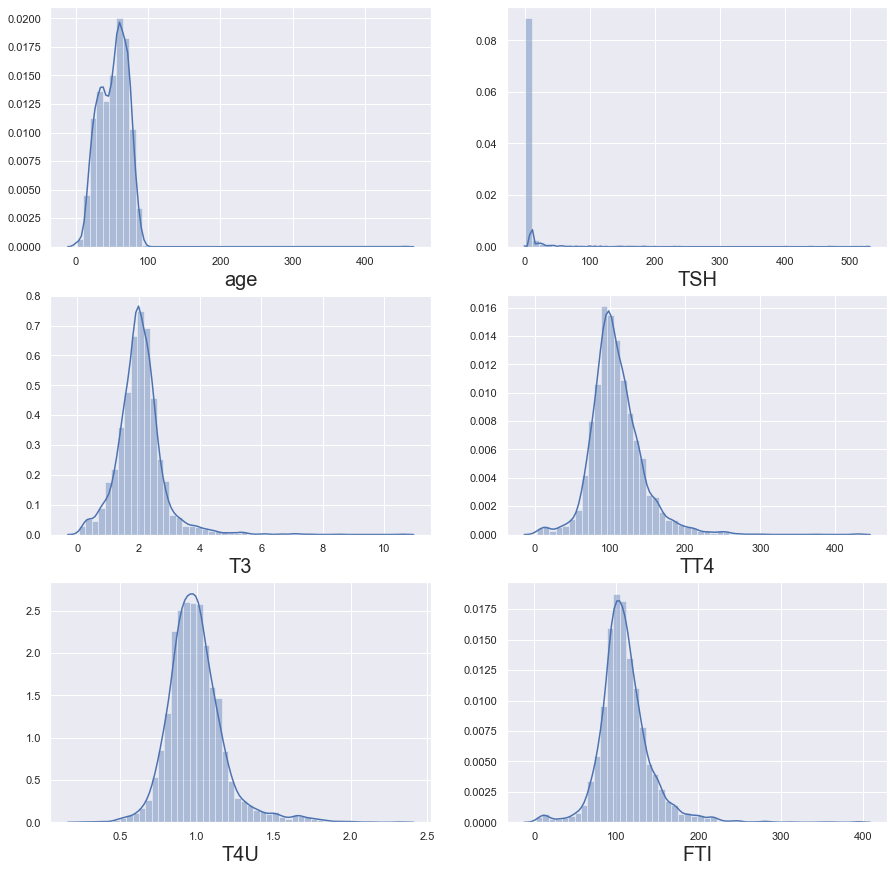

age std:  20.08247803289012
TSH std:  23.318156335228053
T3 std:  0.7606345540367843
TT4 std:  34.83900171735335
T4U std:  0.18873449759969607
FTI std:  32.144287453468365


In [45]:
plotting_columns = ['age','TSH','T3','TT4','T4U','FTI']

plt.figure(figsize=(15,15),facecolor='white')
c = 1

for column in plotting_columns:
    ax = plt.subplot(3,2,c)
    plt.grid(b=True)
    sns.distplot(imputed_data[column])
    plt.xlabel(column,fontsize=20)
    c+=1
plt.show()
for column in plotting_columns:
    print(column+' std: ',imputed_data[column].std())

<b>age,TSH and T3</b> are heavely skewed. Doing log tranformation to normalize them

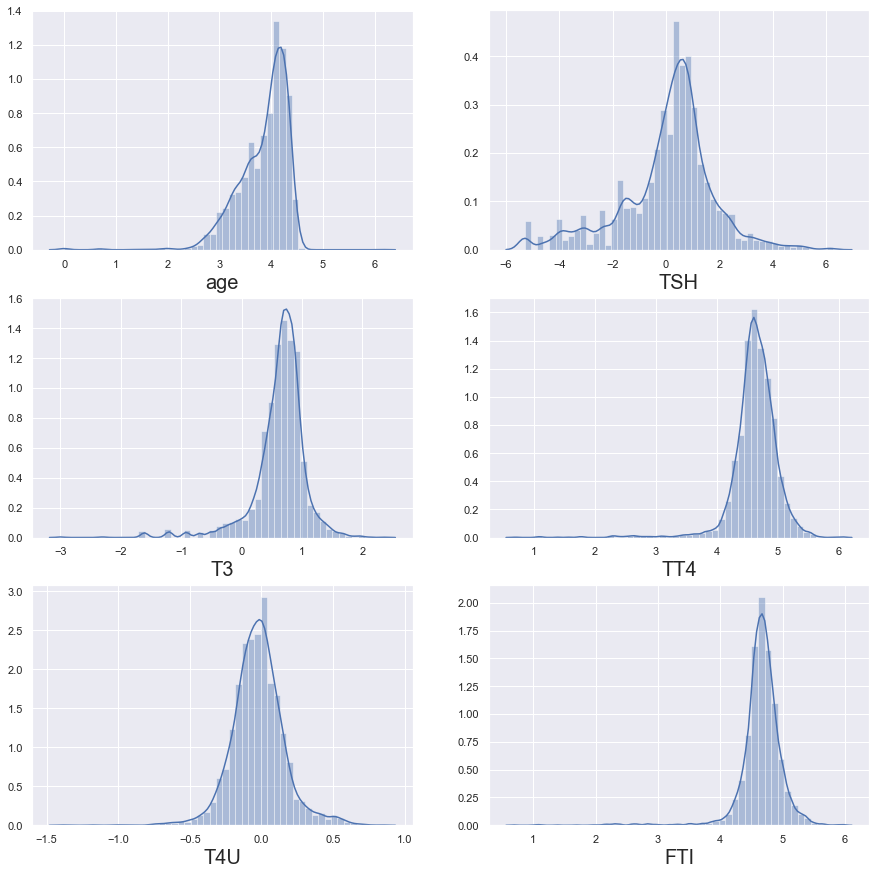

age std:  0.4780583146343892
TSH std:  1.7407485337450659
T3 std:  0.43402532787011167
TT4 std:  0.3815720903944413
T4U std:  0.18369250800166312
FTI std:  0.35986542144250583


In [47]:
c = 1
plt.figure(figsize=(15,15),facecolor='white')
for column in plotting_columns:
    ax = plt.subplot(3,2,c)
    plt.grid(b=True)
    sns.distplot(np.log(imputed_data[column]))
    plt.xlabel(column,fontsize=20)
    c+=1
plt.show()
for column in plotting_columns:
    print(column+' std: ',np.log(imputed_data[column]).std())

Now every columns looks fine

# Checking for Imbalanced data and doing the requirred correction

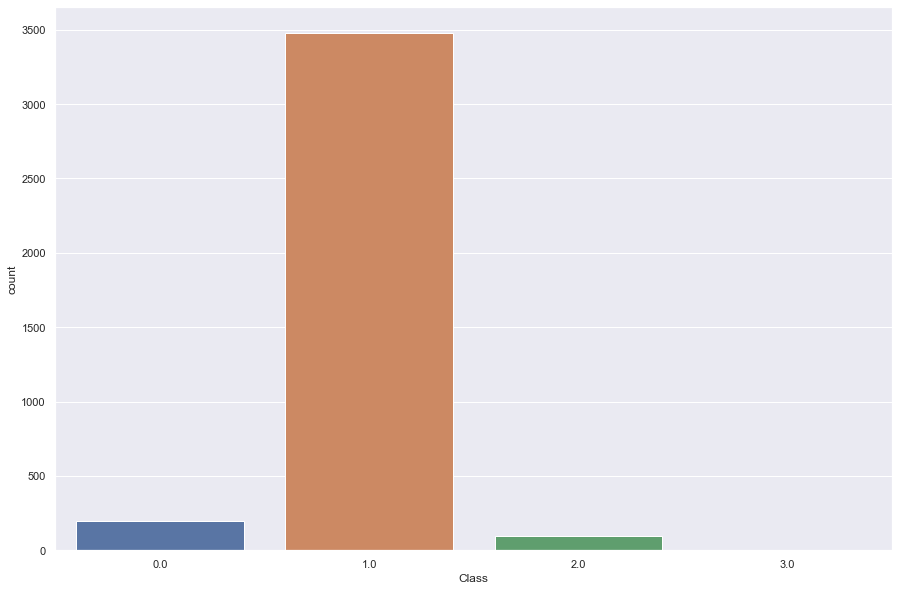

In [52]:
plt.figure(figsize=(15,10))
sns.countplot(imputed_data['Class'])
plt.show()

So we have heavily imbalanced dataset and we need to do oversampling or upsampling for the class values which are less in numbers.

# Upsampling 

We will use a python library known as imbalanced-learn to deal with imbalanced data.
Imbalanced learn has an algorithm called RandomOverSampler.
<br><b>references:</b></br>
<br>Note: https://pypi.org/project/imbalanced-learn/

https://github.com/scikit-learn-contrib/imbalanced-learn


In [54]:
X = imputed_data.drop('Class',axis=1)
Y = imputed_data['Class']

upsampler = RandomOverSampler()
X_upsampled , Y_upsampled = upsampler.fit_sample(X,Y)

X_upsampled.shape, Y_upsampled.shape

((13924, 26), (13924,))

In [55]:
x_upsampled = pd.DataFrame(X_upsampled,columns=X.columns)

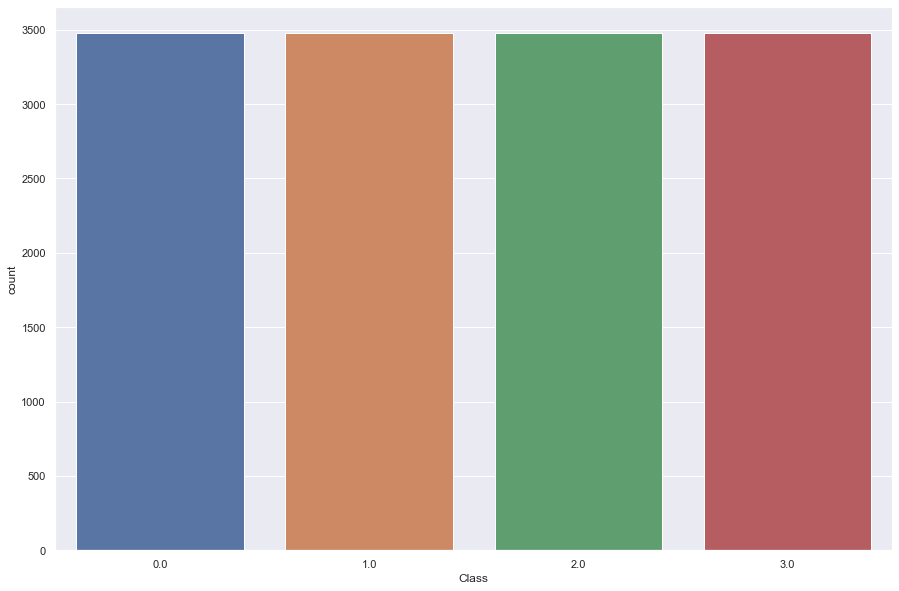

In [56]:
plt.figure(figsize=(15,10))
sns.countplot(Y_upsampled)
plt.show()

# Now everything looks good, we are ready to train our model now.

In [57]:
x_upsampled.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TSH,T3,TT4,T4U,FTI,referral_source_STMW,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_other
0,41.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.30,2.500000,125.0,1.140000,109.000000,0.0,1.0,0.0,0.0,0.0
1,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.10,2.000000,102.0,0.966667,107.666667,0.0,0.0,0.0,0.0,1.0
2,46.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.98,1.633333,109.0,0.910000,120.000000,0.0,0.0,0.0,0.0,1.0
3,70.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.16,1.900000,175.0,1.003333,176.666667,0.0,0.0,0.0,0.0,1.0
4,70.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.72,1.200000,61.0,0.870000,70.000000,0.0,0.0,0.0,1.0,0.0
